In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import EfficientNetV2B2
from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr


In [ ]:
from google.colab import files
files.upload()


Saving TrashType_Image_Dataset.zip to TrashType_Image_Dataset (5).zip
Buffered data was truncated after reaching the output size limit.

In [64]:
import zipfile

with zipfile.ZipFile("TrashType_Image_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [79]:
os.listdir("/content/TrashType_Image_Dataset/TrashType_Image_Dataset")


['glass', 'trash', 'metal', 'plastic', 'cardboard', 'paper']

In [80]:
import tensorflow as tf

dataset_dir = "/content/TrashType_Image_Dataset/TrashType_Image_Dataset"
image_size = (124, 124)
batch_size = 32
seed = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("✅ Classes:", class_names)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
✅ Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


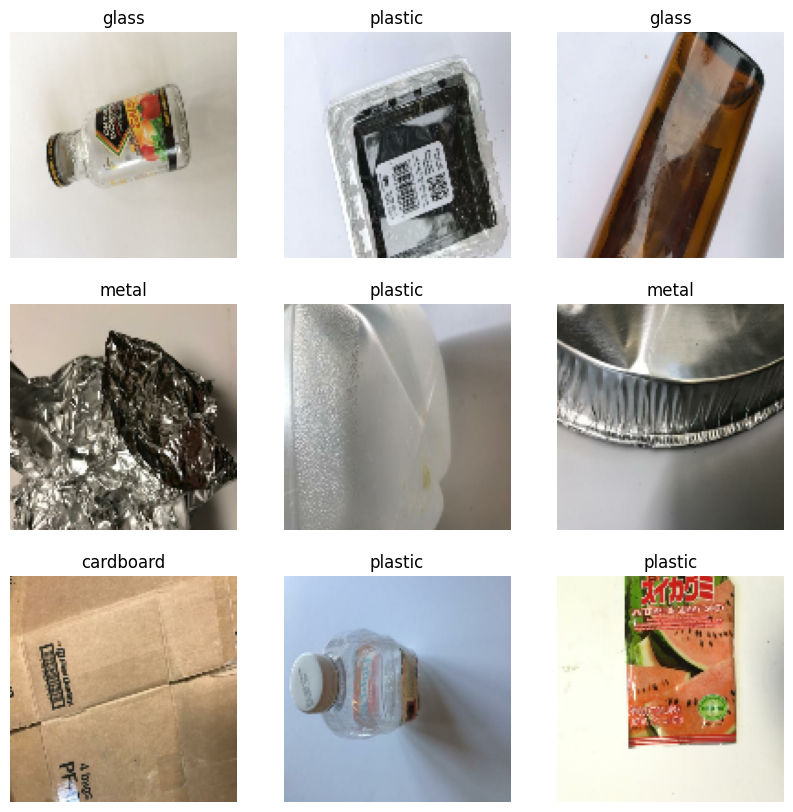

In [81]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
